<a href="https://colab.research.google.com/github/ftmkck66/pneumonia-detection/blob/main/bitirme_prejemm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive


fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive -o nonempty

In [ ]:
import os
os.chdir('/content/drive/chest-x-ray_dataset/chest_xray/chest_xray/test')
!pwd

/content/drive/chest-x-ray_dataset/chest_xray/chest_xray/test


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import keras
from keras.layers import Embedding, GRU, Dense
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import pandas as pd
import tensorflow as tf
from keras import backend as k
import pandas.util.testing as tm


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
DATADIR = "/content/drive/chest-x-ray_dataset/chest_xray/test"
CATEGORIES = ["PNEUMONIA", "NORMAL"]
img_size=150

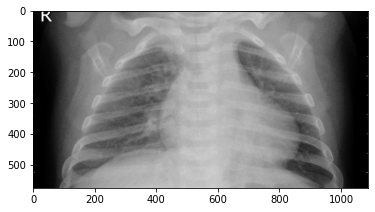

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category) # path to normal and pneumonia
  for img in os.listdir(path):
   # img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    img_array = plt.imread(os.path.join(path, img),plt.get_cmap('gray'))
    plt.imshow(img_array, cmap="gray")
    plt.show()
    print(img_array)
   
    break
  break

In [ ]:
img_size=150
def get_trainingdata = []
    for label in CATEGORIES:
        path = os.path.join(DATADIR, label)
        class_num = CATEGORIES.index(label)
        for img in os.listdir(path):
            try:
                #img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image = plt.imread(os.path.join(path, img), plt.get_cmap('gray'))
                resized = cv2.resize(image, (150, 150))
               # resized_arr = cv2.resize(img_arr, (img_size, img_size))   #görüntüleri yeniden boyutlandırma
                data.append([resized, class_num])
            except Exception as e:
               print(e)
    return np.array(data)
   
   

In [ ]:
train = get_training_data('/content/drive/chest-x-ray_dataset/chest_xray/train')
test = get_training_data('/content/drive/chest-x-ray_dataset/chest_xray/test')
val = get_training_data('/content/drive/chest-x-ray_dataset/chest_xray/val')



In [ ]:
train.shape


(5216, 2)

In [ ]:
test.shape

(624, 2)

In [ ]:
val.shape

(16, 2)

PNEUMONIA


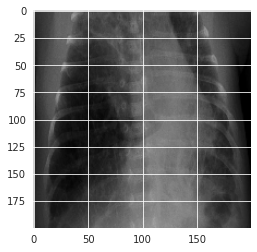

In [ ]:
plt.imshow(train[1][0], cmap='gray')
print(CATEGORIES[train[1][1]])   

NORMAL


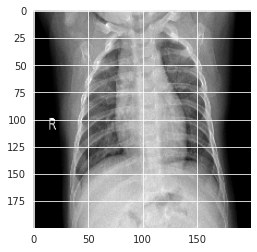

In [ ]:
plt.imshow(train[5000][0], cmap='gray')
print(CATEGORIES[train[5000][1]])

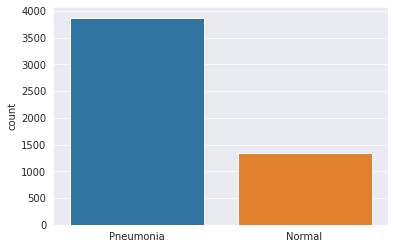

In [ ]:
l = []
for i in train:
   if(i[1] == 0):
        l.append("Pneumonia")
   else:
        l.append("Normal")

sns.set_style('darkgrid')
sns.countplot(l)


Text(0.5, 1.0, 'NORMAL')

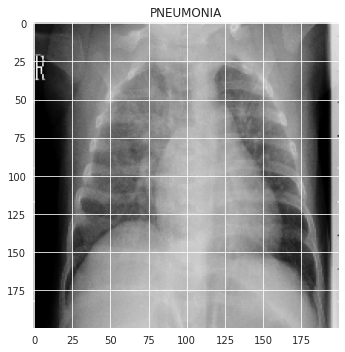

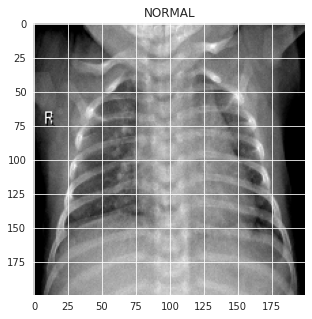

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(train[0][0], cmap='gray')
plt.title(CATEGORIES[train[0][1]])
plt.tight_layout()
plt.figure(figsize=(5, 5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(CATEGORIES[train[-1][1]])

In [ ]:

x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)
for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
pnenumonia = 0 
normal = 0 

for i, j in train:
    if j == 0:
        pnenumonia+=1
    else:
        normal+=1
        
print('Pneumonia:', pnenumonia)
print('Normal:', normal)
print('Pneumonia - Normal:', pnenumonia-normal)

Pneumonia: 3875
Normal: 1341
Pneumonia - Normal: 2534


In [ ]:
# veri için normalizasyon işlemi yapıyoruz
x_train = np.array(x_train) /255
x_val = np.array(x_val) /255
x_test = np.array(x_test) /255


In [ ]:
#derin öğrenme için veriyi yeniden boyutlandırıyoruz

x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)##

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)


In [ ]:


datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range = 30,  # random olarak görüntülerin % 30 unu 180 derece döndürme
        zoom_range = 0.2, # random olarak görüntülerin % 20 sini yakınlaştırma
        width_shift_range=0.1,  # random olarak görüntülerin %10 unu yatay olrak kaydırma
        height_shift_range=0.1,  #random olarak görüntülerin %10 unu dikey olrak kaydırma
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


In [ ]:
#model eğitme
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPool2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, verbose=1
                    , validation_data=datagen.flow(x_val, y_val))

In [ ]:
print("Loss of the model is - ", model.evaluate(x_test,y_test)[0]*100, "%")
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1]*100, "%")

In [ ]:
epochs = [i for i in range(10)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label='Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label='Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1, -1)[0]
predictions[:15]

In [ ]:
print(classification_report(y_test, predictions, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))


In [ ]:
cm = confusion_matrix(y_test, predictions)
print(cm)


In [ ]:
cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="coolwarm", linecolor='black', linewidth=1, annot=True, fmt='')


In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]


In [ ]:
#modeli kaydetme
save_dir = 'chest-x-ray_dataset/resultss/'
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [ ]:
#tahmin sınıfı
i = 0
for c in correct[:6]:
    plt.subplot(3, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150, 150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1
